In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable

#### Add column to geojson, price per sqm for each zipcode

   zip_code            Id          Price  Living area    price-sqm
0      1000  1.010285e+07  493522.262108   134.092457  3680.462508
1      1020  1.010613e+07  476250.000000   182.419355  2610.742706
2      1030  1.016293e+07  383445.103960   136.310502  2813.026858
3      1040  1.014834e+07  534708.333333   137.877778  3878.132807
4      1050  1.003056e+07  757222.451064   163.456522  4632.561876


dict_values([3680.462507738709, 2610.742705570292, 2813.0268580774064, 3878.1328068337502, 4632.561876437847, 3387.7112311187275, 2767.6894599303137, 2021.292639221933, 2527.4559564529773, 2725.746460927326, 2517.453435114504, 2681.144152963652, 2853.497586062133, 3329.784280639112, 4599.867753653514, 4734.038567397839, 3779.140733579068, 4102.936516036601, 2920.380266287731, 3581.249857064084, 2465.5731901587114, 3016.444213127809, 2994.8783610755445, 2671.458001685551, 1502.8294685990338, 1814.919530230535, 3279.7791260932104, 2918.49090517505, 3201.2195121951218, 2657.155025553663, 3447.1481891572257, nan, 3325.100526899612, 4028.671081677704, 1754.1009763985835, 2446.0443293965377, 2389.1250733998827, 1583.3772604588396, 1907.9842388983773, 3517.262732370973, 2698.010082886397, 2283.78587186245, 2377.551020408164, nan, 3377.4526361944177, 2861.1489345119453, 2351.896690879741, 2709.6918767507, 1869.690779610195, 3404.408380525484, 1940.5144694533765, 2123.343065196679, 2091.6776383

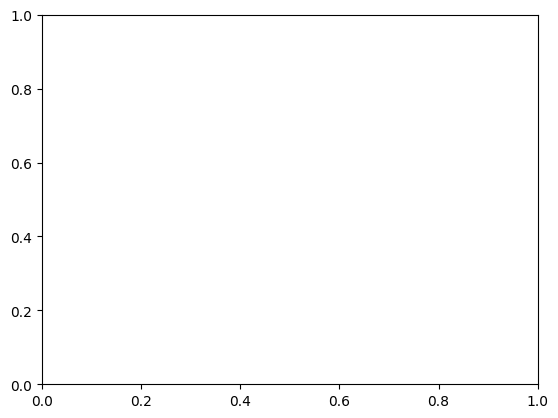

In [79]:
filename = "./datas/georef-belgium-postal-codes.geojson"
file = open(filename)
fig, ax = plt.subplots(1,1)
belgium_map_df = gpd.read_file(file)

zip_pricesqm = pd.read_csv('./price_sqm_meters.csv')
print(zip_pricesqm.head())
zip_pricesqm_dict = zip_pricesqm.set_index('zip_code')['price-sqm'].to_dict()
zip_pricesqm_dict.values()
# belgium_map_df['meanpsqm'] = belgium_map_df['zip_code'].map(zip_pricesqm_dict)


# belgium_map_df.plot( ax=ax, cmap="GnBu", legend=True)
# belgium_map_df.set_title = "Belgium"
# belgium_map_df.describe()
# belgium_map_df.head()




<AxesSubplot: >

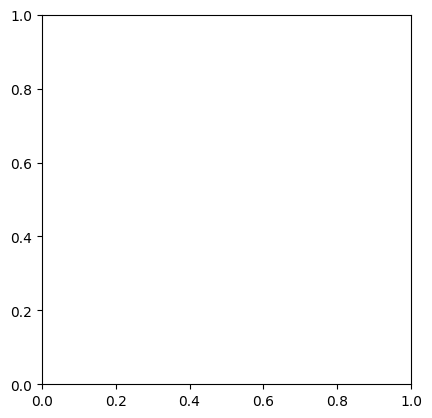

In [40]:
# Open a csv in geopandas

geodatas = gpd.read_file('./datas/georef-belgium-postal-codes.csv', sep=';')
geodatas.head()
fig, ax = plt.subplots(1,1)
geodatas.plot(kind ='geo', ax=ax, legend=True)
# geodatas['Geo Point'].dtype
# belgium_map_csv = gpd.GeoDataFrame(geodatas, geometry='Geo Point')
# belgium_map_csv.head()

In [41]:
belgium_map_df.head()

,geo_point_2d,geo_shape,postcode,special_code,smun_code,reg_code,prov_code,arr_code,mun_code,smun_area_code,...,prov_name_de,prov_name_nl,prov_name_fr,arr_name_de,arr_name_nl,arr_name_fr,mun_name_de,mun_name_nl,mun_name_fr,geometry
0,"{'lon': 4.590807805833395, 'lat': 50.845557194...",None,3061,0,24009C,02000,20001,24000,24009,BEL,...,None,Vlaams-Brabant,Brabant flamand (le),None,Leuven,None,None,Bertem,None,"POLYGON ((4.58659 50.81837, 4.58797 50.81925, ..."
1,"{'lon': 3.9321743559343343, 'lat': 50.71066390...",None,1547,0,23009A,02000,20001,23000,23009,BEL,...,None,Vlaams-Brabant,Brabant flamand (le),None,Halle-Vilvoorde,Hal-Vilvorde,None,Bever,Biévène,"POLYGON ((3.90965 50.69248, 3.91017 50.69258, ..."
2,"{'lon': 4.014183549287835, 'lat': 50.795727309...",None,9400,0,41048F,02000,40000,41000,41048,BEL,...,None,Oost-Vlaanderen,Flandre orientale (la),None,Aalst,None,None,Ninove,None,"POLYGON ((3.96872 50.80672, 3.96837 50.80629, ..."
3,"{'lon': 3.756207077499878, 'lat': 51.228166383...",None,9960,0,43002A,02000,40000,43000,43002,BEL,...,None,Oost-Vlaanderen,Flandre orientale (la),None,Eeklo,None,None,Assenede,None,"POLYGON ((3.76465 51.19134, 3.76811 51.19193, ..."
4,"{'lon': 3.9665052522195245, 'lat': 50.85407606...",None,9400,0,41048L,02000,40000,41000,41048,BEL,...,None,Oost-Vlaanderen,Flandre orientale (la),None,Aalst,None,None,Ninove,None,"POLYGON ((3.96666 50.86794, 3.96600 50.86793, ..."


<AxesSubplot: >

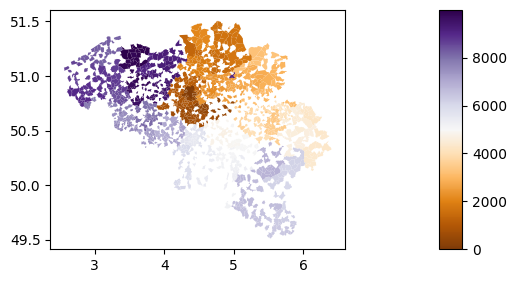

In [72]:
# belgium_map_df.plot("prov_name_fr")
fig, ax = plt.subplots(1,1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
# color bar
vmax = belgium_map_df['postcode'].max()
mappable = plt.cm.ScalarMappable(cmap='PuOr', norm=plt.Normalize(vmin=0, vmax=vmax))
cbar = fig.colorbar(mappable, cax=cax)
belgium_map_df.plot(kind="geo",column='postcode',
                    ax=ax,
                    cax=cax,
                    cmap="PuOr")
# ax.set_visible(False)
